# ITMAL Exercise


REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section.           

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

NAME           |   SYMBOL   | ALIAS
---------------| --------------------
true positives | $TP$ |
true negatives | $TN$ | 
false positives| $FP$ | type I error 
false negatives| $FN$ | type II error 

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{TP + FN}\\ 
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [2]:
# TODO: Qa...
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from libitmal import utils as itmalutils
from libitmal import dataloaders
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict


def GetConfusionParams(y_pred, y_true):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(0, len(y_pred)):
        if y_pred[i] == True == y_true[i]:
            TP += 1
        elif y_pred[i] == True != y_true[i]:
            FP += 1
        elif y_pred[i] == False != y_true[i]:
            FN += 1
        elif y_pred[i] == False == y_true[i]:
            TN += 1            
    
    return TP, FP, FN, TN

def MyAccuracy(y_pred, y_true):
    TP, FP, FN, TN = GetConfusionParams(y_pred, y_true)
    
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    
    return accuracy


# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(y_pred, y_true):
    a0=MyAccuracy(y_pred, y_true)
    a1=accuracy_score(y_pred, y_true)

    print("\nmy a          =",a0)
    print("scikit-learn a=",a1)

    itmalutils.InRange(a0,a1)

X, y = dataloaders.MNIST_GetDataSet()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

sgd_clf.fit(X_train, y_train_5)

y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)

TestAccuracy(y_test_pred, y_test_5)


my a          = 0.9604
scikit-learn a= 0.9604


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [3]:
# TODO: Qb..
from sklearn.metrics import precision_score, recall_score, f1_score 

def MyPrecision(y_pred, y_true):
    TP, FP, FN, TN = GetConfusionParams(y_pred, y_true)
    
    precision = TP / (TP + FP)
    
    return precision

def MyRecall(y_pred, y_true):
    TP, FP, FN, TN = GetConfusionParams(y_pred, y_true)

    recall = TP / (TP + FN)
    
    return recall

def MyF1Score(y_pred, y_true):
    TP, FP, FN, TN = GetConfusionParams(y_pred, y_true)
    print(TP, FP, FN, TN)
    recall = MyRecall(y_pred, y_true)
    precision = MyPrecision(y_pred, y_true)
    
    f1_score = 2 / (recall**-1 + precision**-1)
    
    return f1_score

# TODO: your test code here!

def TestPrecision(y_pred, y_true):
    p0=MyPrecision(y_pred, y_true)
    p1=precision_score(y_true, y_pred)

    print("\nmy p          =",p0)
    print("scikit-learn p=",p1)

    itmalutils.InRange(p0,p1)
    
TestPrecision(y_test_pred, y_test_5)


def TestRecall(y_pred, y_true):
    r0=MyRecall(y_pred, y_true)
    r1=recall_score(y_true, y_pred)

    print("\nmy r          =",r0)
    print("scikit-learn r=",r1)

    itmalutils.InRange(r0,r1)

TestRecall(y_test_pred, y_test_5)


def TestF1Score(y_pred, y_true):
    f1_0=MyF1Score(y_pred, y_true)
    f1_1=f1_score(y_true, y_pred)

    print("\nmy f1          =",f1_0)
    print("scikit-learn f1=",f1_1)

    itmalutils.InRange(f1_0,f1_1)

TestF1Score(y_test_pred, y_test_5)

print("\n")
print(confusion_matrix(y_test_5, y_test_pred))
print(GetConfusionParams(y_test_pred, y_test_5))


my p          = 0.8107769423558897
scikit-learn p= 0.8107769423558897

my r          = 0.7253363228699552
scikit-learn r= 0.7253363228699552
647 151 245 8957

my f1          = 0.7656804733727811
scikit-learn f1= 0.7656804733727811


[[8957  151]
 [ 245  647]]
(647, 151, 245, 8957)


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [4]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin 

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 
M_sgd = confusion_matrix(y_test_5, y_test_pred)
itmalutils.PrintMatrix(M_sgd,"M_sgd=")

dum_clf = DummyClassifier()

M_dum = confusion_matrix(y_test_5, cross_val_predict(dum_clf, X_test, y_test_5, cv=3))
itmalutils.PrintMatrix(M_dum,"M_dum=")


'''
The confusion matrix switches the places of the false positives and the false negatives around as shown in M_dum_switch
'''
M_dum_switch = confusion_matrix(cross_val_predict(dum_clf, X_test, y_test_5, cv=3), y_test_5)
itmalutils.PrintMatrix(M_dum_switch,"M_dum_switch=")

# https://en.wikipedia.org/wiki/Covariance_matrix

M_sgd=[[8957  151]
       [ 245  647]]
M_dum=[[9108    0]
       [ 892    0]]
M_dum_switch=[[9108  892]
              [   0    0]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

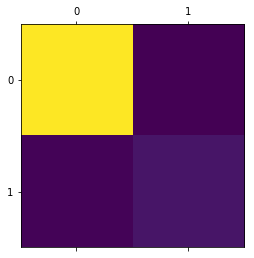

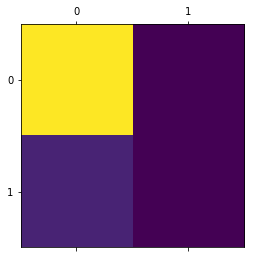

In [5]:
# TODO: Qd
import matplotlib.pyplot as plt

plt.matshow(M_sgd)
plt.show()

plt.matshow(M_dum)
plt.show()

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

In [7]:
# TODO: Qe...
# Downloaded Global Terrorist Database: https://www.kaggle.com/START-UMD/gtd
# Want to classify if the country is Iraq (country number 95) given the attributes longitude and latitude
import numpy as np
import pandas as pd

gtd = pd.read_csv("gtd/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
print("Shape of raw data: ", gtd.shape)

gtd_pos = gtd.dropna(subset=["latitude", "longitude"])
print("Shape after dropping all rows without a latitude or longtitude feature: ", gtd_pos.shape)

gtd_trimmed = gtd_pos[["country", "latitude", "longitude"]]
print("Shape after dropping attributes with features except country, longitude and latitude: ", gtd_trimmed.shape, "\n")


y = gtd_trimmed["country"]
X = gtd_trimmed.drop("country", axis="columns")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

country_number = 95
y_train_country = (y_train == country_number)
y_test_country = (y_test == country_number)

print("Number of Iraq incidents in y_train: ", (y_train_country == True).sum())
print("Number of Iraq incidents in y_test: ", (y_test_country == True).sum())

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def clf_score(scoring_method):
    score = scoring_method(y_test_country, y_pred)
    print(scoring_method.__name__, ": ", score)

C:\Users\lukas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of raw data:  (181691, 135)
Shape after dropping all rows without a latitude or longtitude feature:  (177134, 135)
Shape after dropping attributes with features except country, longitude and latitude:  (177134, 3) 

Number of Iraq incidents in y_train:  18423
Number of Iraq incidents in y_test:  6064


Testing SGDClassifier on dataset
Number of Iraq incidents in y_pred:  3641 

[[34580  3640]
 [ 6063     1]]


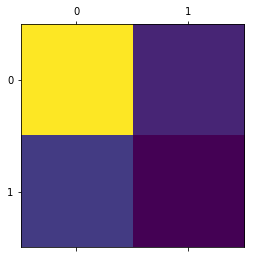

accuracy_score :  0.7808915183813567
precision_score :  0.00027464982147761604
recall_score :  0.00016490765171503957
f1_score :  0.00020607934054611026


In [8]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=5, tol=-np.inf)
print("Testing", clf.__class__.__name__, "on dataset")

clf.fit(X_train, y_train_country)

y_pred = cross_val_predict(clf, X_test, y_test_country, cv=3)
print("Number of Iraq incidents in y_pred: ", (y_pred == True).sum(), "\n")

M = confusion_matrix(y_test_country, y_pred)
print(M)
plt.matshow(M)
plt.show()

clf_score(accuracy_score)
clf_score(precision_score)
clf_score(recall_score)
clf_score(f1_score)

Testing MLPClassifier on dataset


C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of Iraq incidents in y_pred:  5831 

[[38055   165]
 [  398  5666]]


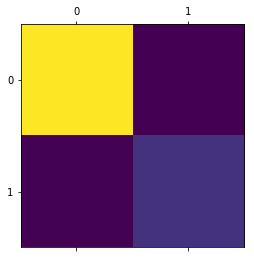

accuracy_score :  0.9872866046427604
precision_score :  0.9717029669010462
recall_score :  0.9343667546174143
f1_score :  0.9526691887347625


In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
print("Testing", clf.__class__.__name__, "on dataset")

clf.fit(X_train, y_train_country)

y_pred = cross_val_predict(clf, X_test, y_test_country, cv=3)
print("Number of Iraq incidents in y_pred: ", (y_pred == True).sum(), "\n")

M = confusion_matrix(y_test_country, y_pred)
print(M)
plt.matshow(M)
plt.show()

clf_score(accuracy_score)
clf_score(precision_score)
clf_score(recall_score)
clf_score(f1_score)

Testing KNeighborsClassifier on dataset
Number of Iraq incidents in y_pred:  6059 

[[38215     5]
 [   10  6054]]


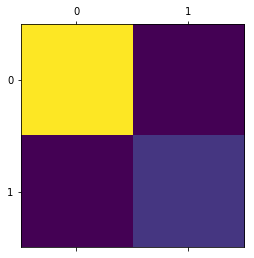

accuracy_score :  0.9996612772107307
precision_score :  0.9991747813170491
recall_score :  0.9983509234828496
f1_score :  0.9987626825043306


In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
print("Testing", clf.__class__.__name__, "on dataset")

clf.fit(X_train, y_train_country)

y_pred = cross_val_predict(clf, X_test, y_test_country, cv=3)
print("Number of Iraq incidents in y_pred: ", (y_pred == True).sum(), "\n")

M = confusion_matrix(y_test_country, y_pred)
print(M)
plt.matshow(M)
plt.show()

clf_score(accuracy_score)
clf_score(precision_score)
clf_score(recall_score)
clf_score(f1_score)